In [45]:
import pandas as pd
import numpy as np

In [94]:
train = pd.read_csv('..//big_mart_sale_data//Train_UWu5bXk.csv')
test = pd.read_csv('..//big_mart_sale_data//Test_u94Q5KV.csv')

In [95]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [96]:
data = pd.concat([train , test] ,ignore_index=True)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [97]:
## only columns which is having object only
data.select_dtypes(include=[np.object]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [98]:
data.shape

(14204, 12)

In [99]:
data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [100]:
## two variable are having missing values item_type ,outlet_size
##outlet sale are target variable which was not present in test data

In [101]:
## fill the null values in data cleaning

In [102]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [103]:
### lets have a look unique value in each item
data.apply(lambda x :len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

In [104]:
## filter categorical variable
categorical_variable = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
exclude_variable = [x for x in categorical_variable if x not in ['Item_Identifier' , 'Outlet_Identifier' ,'source']]
## print frequency of categories
for i in exclude_variable:
    print(data[i].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [105]:
#The output gives us following observations:

#Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
#Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing i


In [106]:
## data cleaning
#handle the missing values
from sklearn.preprocessing import Imputer

In [107]:
imp = Imputer(missing_values='NaN' , axis = 0 ,strategy='mean')
#imp.fit_transform(np.array(data.Item_Weight.reshape(-1,1)))
data.Item_Weight = imp.fit_transform(np.array(data.Item_Weight.reshape(-1,1)))
data.Item_Outlet_Sales = imp.fit_transform(np.array(data.Item_Outlet_Sales.reshape(-1,1)))

C:\Users\DU357159\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DU357159\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [108]:
from scipy.stats import mode

#Determing the mode for each
#outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
#print 'Mode for each Outlet_Type:'
#print outlet_size_mode
from collections import Counter


In [109]:
sorted(Counter(data.Outlet_Size).items() , key = lambda x:x[1])[-1][0]

'Medium'

In [110]:
# so maximum is medium

In [111]:
data.Outlet_Size = data.Outlet_Size.replace(np.nan , "Medium")


In [112]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1076.412666
Supermarket Type1,2262.232963
Supermarket Type2,2069.766739
Supermarket Type3,3088.550567


In [113]:
## combining type2 and type3 wont be good idea

In [114]:
## modify item visibility
sum(data['Item_Visibility']==0)

879

In [115]:
x = data['Item_Visibility'].mean()
x

0.06595278007399345

In [116]:
sum(data['Item_Visibility']==0)

879

In [117]:
data.Item_Visibility = data.Item_Visibility.replace(0 ,x)

In [118]:
sum(data.Item_Visibility.isnull())

0

In [119]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070034,12.792854,1997.830681
std,62.086938,1321.864430,0.048602,4.234226,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000
25%,94.012000,1468.089000,0.033143,9.300000,1987.000000
50%,142.247000,2181.288914,0.062347,12.792854,1999.000000
75%,185.855600,2181.288914,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [120]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [121]:
##modifies category of food contens
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [122]:
data.Item_Fat_Content = data.Item_Fat_Content.replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'})

In [123]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [124]:
## categorical and one hot encoding
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.200000,1998,OUT010,Tier 3,Medium,Grocery Store,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.065953,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.065953,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,Food
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,Food
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,Medium,Supermarket Type3,Food
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Medium,Supermarket Type1,Food
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Medium,Supermarket Type1,Food


In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])


In [127]:
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [128]:
for i in var:
    data[i] = le.fit_transform(data[i])

In [129]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [130]:
data.drop(['Item_Type' , 'Outlet_Establishment_Year'] , inplace = True , axis = 1)

In [131]:
y = data["Item_Outlet_Sales"]

In [132]:
x = data.drop(["Item_Outlet_Sales" ,'Item_Identifier' , 'Outlet_Identifier'] ,axis = 1)


In [133]:
from sklearn.model_selection import train_test_split


In [134]:
x_train ,x_text ,y_train,y_test = train_test_split(x,y , test_size = 0.3,random_state = 4)

In [135]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [150]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
# print predictors
model = LinearRegression(normalize = True)
model.fit(x_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [147]:
pred = model.predict(x_text)

In [146]:
model.score(x_text,y_test)

0.3287143964124518

In [148]:
from sklearn import metrics

print("mse" , metrics.mean_squared_error(y_test ,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


mse 1166370.5495626717
RMSE: 1079.9863654522087


mse 1166370.5495626717
RMSE: 1079.9863654522087


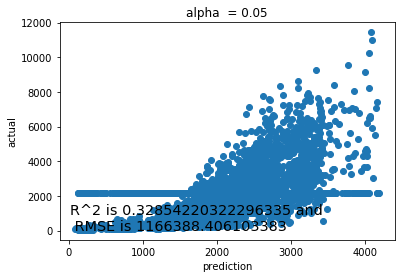

In [155]:

lr = Ridge(alpha = 0.05 ,normalize = True)
ridge_model = lr.fit(x_train ,y_train)
pred_ridge = ridge_model.predict(x_text)
print("mse" , metrics.mean_squared_error(y_test ,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(pred_ridge , y_test)
plt.xlabel("prediction")
plt.ylabel("actual")
plt.title("alpha  = {}".format(0.05))
overlay = "R^2 is {} and \n RMSE is {}".format(model.score(x_text,y_test) , metrics.mean_squared_error(y_test ,pred_ridge,))
plt.annotate(overlay , xy = (12.1, 10.6) , size = 'x-large')
plt.show()